# Diabetics Prediction System based on Life Style

## 1. Dataset used:

The dataset for this analysis is from the India National Institute of Diabetes and Digestive and Kidney Diseases. It is focused in females at least 21 years old of Pima Indian heritage. The datasets consists of a few medical predictor variables such as the number of patient's pregnancies, their BMI (body mass index), insulin level, and age. There is one target variable, the Outcome that is equal to 1 if the pacient has diabetes.

https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [109]:
#importing dataset from IBM Cloud Object Storage

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_6a3db5010eb74fb6b540907fb443d1cb = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='yvNDzJfX1eU9jLG5fMUeaCuFgYRXO0uDk-y_Fpi5pyzW',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_6a3db5010eb74fb6b540907fb443d1cb.get_object(Bucket='diabeticspredictionsystembasedonl-donotdelete-pr-jqt3jwkdklxsxd',
                                                          Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


In [110]:
# Importing libraries to perform the analysis

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
%matplotlib inline


df = pd.read_csv(body)

## 2. Checking the data

### Checking the size of the dataset and the data types:

In [111]:
print (df.shape)

(768, 9)


In [112]:
print(df.dtypes)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### Checking the outcomes
### 0 means no diabetes and 1 a positive diagnostic

Outcome
0    500
1    268
dtype: int64


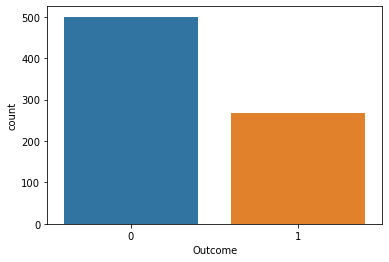

In [113]:
print(df.groupby('Outcome').size())
sns.countplot(x='Outcome',data=df)
plt.show()

In [114]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Showing the dataset

In [115]:
df.head(30)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1



## 3. Descriptive Analysis

### Brief statically description of the dataset

In [116]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Spliting the variables and comparing then individually with the target, the outcome

The figures show the number os positive diagnostics according to each value for the variables presents in this dataset.
- The number o outcomes drop down as the number of pregnancies increase. At fist look, it is possible to say that this happens because less women have a large number of pregnancies;
- Looking at the glucose variable it is possible to see the increase of the positives after the number 100. This can indicates a great sigficance of this varible;
- The outcomes concentrate between 60 and 90 for the bloodpressure with a significant peak at the 70;
- The Skin Thickness and Insulin show a similar behaviour. In both cases the outcome is concentrated at the mark 0;
- Outcomes in BMI context clearly are concentrated in the range between 25 and 45;
- As the Diabetes Pedigree Number increases the outcome decreases;
- Age shows a great inconstance for this dataset.


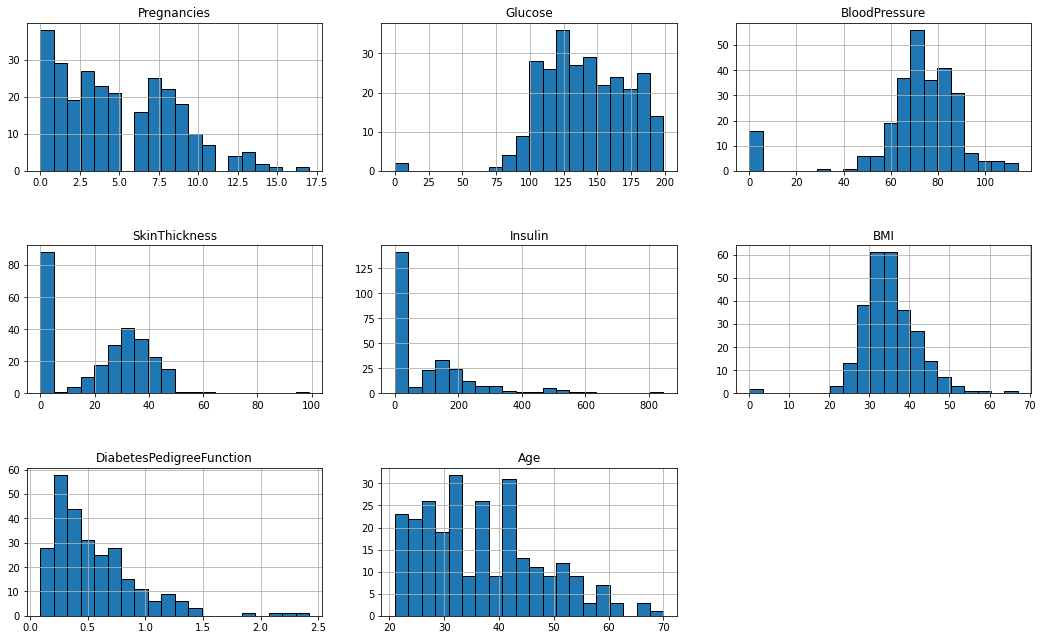

In [117]:
diabetes=df[df['Outcome']==1]
columns=diabetes.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diabetes[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### The plotted graph below presents the correlations between a variable with the others

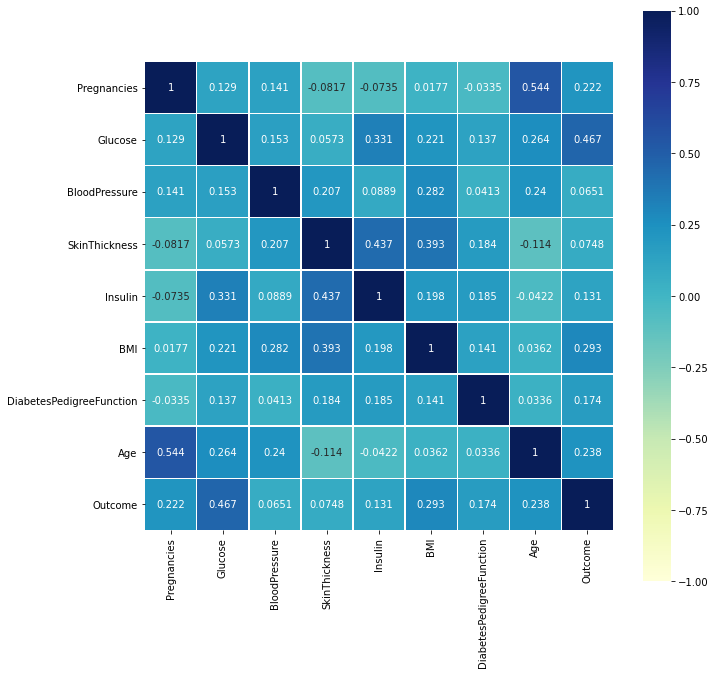

In [118]:
fig, ax = plt.subplots(figsize=(10.5,10.5))
sns.heatmap(df.corr(),
            annot=True,
            fmt='.3g',
            vmin=-1, vmax=1,
            center= 0,
            cmap= 'YlGnBu',
            linewidths=.3,
            square=True)

## 4. Splitting Dataset in to Independent variable and Dependent variable

In [119]:
# Using iloc from Pandas to fix the indexes
# Considering all parameters
x = df.iloc[:, 0:8].values

# Considering Outcome
y = df.iloc[:, 8].values

## 5.  Splitting the Dataset in to Train set and Testing set

#### The dataset will be split in 70% to train and the remaining 30% to test.
#### To build the model, there will be created 4 sets:
#### - x_train: training part of the matrix of features 
#### - x_test: testing part of the matrix of features 
#### - y_train: training part of the dependent variables 
#### - y_test: testing part of the dependent variables 


In [138]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=66)

## 6. Data Normalization


The aim of this topic is standardize the range of independent variables data in order to avoid distortions.<br>
For this analysis, it will be used the Min-Max approach for normalization.

In [139]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)

x_test_minmax = min_max_scaler.fit_transform(x_test)

## 7. Building the Model

### 7.1 Fitting a Multiple Linear Model

The graph shows that the curve using a linear model in blue does not fitted well.

### Multiple Linear Model Estimated:
 ### Outcome = -0.81 + 0.38\*Pregnancies + 1.28\*Glucose + -0.29\*BP + -0.04\*ST + -0.08\*Insulin + 0.88\*BMI + 0.25\*DPF + 0.08\*Age

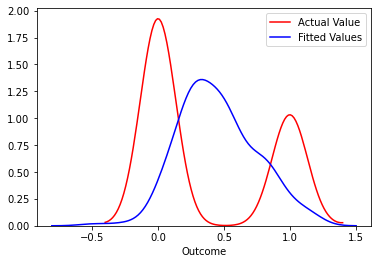

In [140]:
from sklearn.linear_model import LinearRegression
from IPython.display import display, Markdown

linear_model = LinearRegression()
linear_model.fit(x_train_minmax, y_train)
yhat = linear_model.predict(x_test_minmax)

b_0 = linear_model.intercept_
b_1 = linear_model.coef_

#print(f"Multiple Linear Model Estimated:\nOutcome: {b_0:.2f} + {b_1[0]:.2f}*Pregnancies + {b_1[1]:.2f}*Glucose + {b_1[2]:.2f}*BP + {b_1[3]:.2f}*ST + {b_1[4]:.2f}*Insulin + {b_1[5]:.2f}*BMI + {b_1[6]:.2f}*DPF + {b_1[7]:.2f}*Age")
display(Markdown(f"### Multiple Linear Model Estimated:\n ### Outcome = {b_0:.2f} + {b_1[0]:.2f}\*Pregnancies + {b_1[1]:.2f}\*Glucose + {b_1[2]:.2f}\*BP + {b_1[3]:.2f}\*ST + {b_1[4]:.2f}\*Insulin + {b_1[5]:.2f}\*BMI + {b_1[6]:.2f}\*DPF + {b_1[7]:.2f}\*Age"))

# Distribution Plot
ax1 = sns.distplot(df['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

### 7.2 Polynomial Regression Model

In order to analyze if any polynomial order would fit the model, a test was conducted.<br>
The Coefficient of Determination (R-square) varies from 0 to 1. In this case, as higher the number the better.<br>
If the number is negative, this indicates that the function oscillates not tracking the function. The model is too flexible and fits the noise and not the function.

In [141]:
rsquare_test = []
polynomial_order = [1,2,3,4]

for n in polynomial_order:
    polynomial_regression = PolynomialFeatures(degree = n)
    x_train_poly = polynomial_regression.fit_transform(x_train_minmax)
    x_test_poly = polynomial_regression.fit_transform(x_test_minmax)
    
    linear_model.fit(x_train_poly, y_train)
    rsquare_test.append(linear_model.score(x_test_poly, y_test))

print(f"R²: {rsquare_test}")

R²: [0.1521214382966618, 0.07142705978239883, -4.784710701179425, -9365.340226383612]


### 7.3 k-Nearest Neighbors


A k-NN test was performed to verify the number of neighbors to taken in account.<br>
The plot shows that as the n increases, the training accuracy decreases while the test accuracy increases. A middle point has to be chosen, in this case the 13.

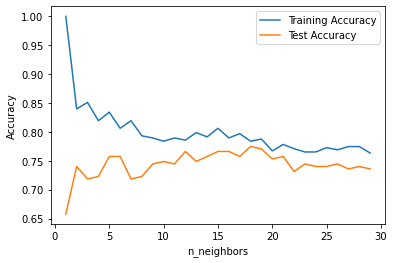

In [142]:
from sklearn.neighbors import KNeighborsClassifier

knn_training_accuracy = []
knn_test_accuracy = []
neighbors_settings = range(1, 30)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train_minmax, y_train)
    # record training set accuracy
    knn_training_accuracy.append(knn.score(x_train_minmax, y_train))
    # record test set accuracy
    knn_test_accuracy.append(knn.score(x_test_minmax, y_test))

plt.plot(neighbors_settings, knn_training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, knn_test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [143]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train_minmax, y_train)

print(f"Accuracy of K-NN classifier on training set: {knn.score(x_train_minmax, y_train):.2f}")
print(f"Accuracy of K-NN classifier on test set: {knn.score(x_test_minmax, y_test):.2f}")

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.77


### 7.4 Logistic Regression


For a Outcome that is either 0 or 1, this model could fit well.<br>
The c value corresponds to the inverse of regularization strength. Smaller values specify stronger regularization.<br>
- The default value of C=1 provides good results with accuracy in 77,3% for training and 75,8% for test;
- Increasing the regulation (C=0.1) results in less accuracy values in both sets;
- Finally, using a bigger value of C=10 results in a little decrease for training and a small increase for the test accuracy. This demonstrates that a more complex model and less regularization would not be better than the default one.

In [144]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1).fit(x_train_minmax, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(x_train_minmax, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(x_test_minmax, y_test)))

Training set accuracy: 0.773
Test set accuracy: 0.758


In [145]:
logreg = LogisticRegression(C=0.1).fit(x_train_minmax, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(x_train_minmax, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(x_test_minmax, y_test)))

Training set accuracy: 0.683
Test set accuracy: 0.779


In [146]:
logreg = LogisticRegression(C=10).fit(x_train_minmax, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(x_train_minmax, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(x_test_minmax, y_test)))

Training set accuracy: 0.765
Test set accuracy: 0.732


### 7.5 Decision Tree


The accuracy on training set for the dafault value is 100%. On the other hand, the test accuracy is equal to 58.4%. The result clearly indicates that the model is overfitting the training data and has difficults to generalizing well to new data.<br>
A test was made to see what would be the better max_depth for the tree. It is possible to see that as the value of the depth increases, the accuracy on training increases and the test accuracy decreses. The value of max_depth 2 was chosen.<br><br>
For the max_depth equals to 3:
- Accuracy on training set: 74.30%
- Accuracy on test set: 75.32%

In [147]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train_minmax, y_train)
print(f"Accuracy on training set: {tree.score(x_train_minmax, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(x_test_minmax, y_test):.3f}")

Accuracy on training set: 1.000
Accuracy on test set: 0.584


In [148]:
tree_training_accuracy = []
tree_test_accuracy = []
tree_settings = range(1, 15)

for depth in tree_settings:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(x_train_minmax, y_train)
    tree_training_accuracy.append(tree.score(x_train_minmax, y_train))
    tree_test_accuracy.append(tree.score(x_test_minmax, y_test))

print(f"Accuracy on training set: {tree_training_accuracy}")
print(f"\nAccuracy on test set: {tree_test_accuracy}")

Accuracy on training set: [0.7337057728119181, 0.7430167597765364, 0.7728119180633147, 0.8063314711359404, 0.8379888268156425, 0.8640595903165735, 0.9068901303538175, 0.9422718808193669, 0.9608938547486033, 0.9795158286778398, 0.9869646182495344, 0.9962756052141527, 0.9981378026070763, 1.0]

Accuracy on test set: [0.645021645021645, 0.7532467532467533, 0.6190476190476191, 0.6666666666666666, 0.6320346320346321, 0.645021645021645, 0.5974025974025974, 0.5974025974025974, 0.5844155844155844, 0.5627705627705628, 0.5584415584415584, 0.5757575757575758, 0.5800865800865801, 0.5844155844155844]


### Feature importance in Decision Trees

The feature importance rates how each feature is important for the decision a tree makes.<br>
It is possible to see that the most important feature of the model is the Glucose (34.09%) as showed in the graph and in the numbers. 

In [149]:
print(f"Feature importances:\n{tree.feature_importances_}")

Feature importances:
[0.04942115 0.34087366 0.09186578 0.06654777 0.06474831 0.14082723
 0.12101442 0.1247017 ]


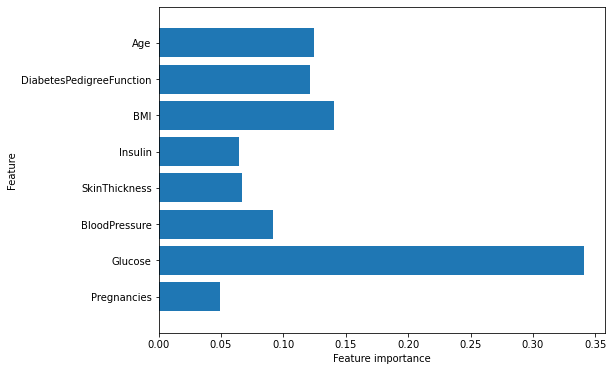

In [150]:
diabetes_features = [ x for i,x in enumerate(df.columns) if i != 8 ]

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

### 7.6 Random Forest

The default value of random forest consists of 100 trees. I results in 100% for the training set and 72.7% for the test set in terms of accuracy. It is the best result so far in any model analysed here.<br>
In order to verify possible improvement for the model a test was performed changing the the default max_depth for the trees. The test shows that the max_depth of 13 increases the accuracy on test set to 73.6% with no changes in the training set accuracy.

In [151]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(x_train_minmax, y_train)
print(f"Accuracy on training set: {random_forest.score(x_train_minmax, y_train):.3f}")
print(f"Accuracy on test set: {random_forest.score(x_test_minmax, y_test):.3f}")

Accuracy on training set: 1.000
Accuracy on test set: 0.727


In [152]:
rf_training_accuracy = []
rf_test_accuracy = []
rf_settings = range(1, 15)

for depth in rf_settings:
    rf = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=0)
    rf.fit(x_train_minmax, y_train)
    rf_training_accuracy.append(rf.score(x_train_minmax, y_train))
    rf_test_accuracy.append(rf.score(x_test_minmax, y_test))

print(f"Accuracy on training set: {rf_training_accuracy}")
print(f"\nAccuracy on test set: {rf_test_accuracy}")

Accuracy on training set: [0.6871508379888268, 0.7597765363128491, 0.7970204841713222, 0.8361266294227188, 0.8621973929236499, 0.8994413407821229, 0.9459962756052142, 0.9795158286778398, 0.994413407821229, 0.9981378026070763, 1.0, 1.0, 1.0, 1.0]

Accuracy on test set: [0.7445887445887446, 0.7575757575757576, 0.7445887445887446, 0.7619047619047619, 0.7445887445887446, 0.7575757575757576, 0.7575757575757576, 0.7445887445887446, 0.7316017316017316, 0.7532467532467533, 0.7445887445887446, 0.7359307359307359, 0.7316017316017316, 0.7316017316017316]


In [157]:
random_forest = RandomForestClassifier(max_depth=12, n_estimators=100, random_state=0)
random_forest.fit(x_train_minmax, y_train)
print(f"Accuracy on training set: {random_forest.score(x_train_minmax, y_train):.3f}")
print(f"Accuracy on test set: {random_forest.score(x_test_minmax, y_test):.3f}")

Accuracy on training set: 1.000
Accuracy on test set: 0.736


### Feature Importance in Random Forest

In [155]:
print(f"Feature importances:\n{random_forest.feature_importances_}")

Feature importances:
[0.06140087 0.3581163  0.0398456  0.05942545 0.07888453 0.14602645
 0.07284363 0.18345717]


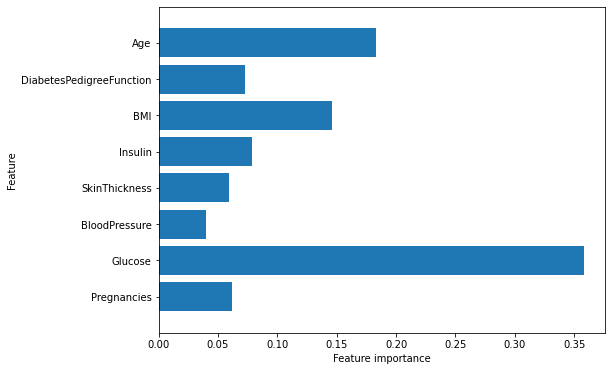

In [156]:
plot_feature_importances_diabetes(random_forest)

# 8. Conclusion

Different types of machine learning models for classification and regression were applied to the dataset. It is important to see the different results from the algorithms and how the results can change with adjusts in the parameters.<br>

The best result was for the Random Forest with the marks of 100% of accuracy on training test and 73.6% for the test accuracy.